In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data with three symptoms per disease
data = {
    'Symptom1': ['Fever', 'Cough', 'Headache', 'Fatigue', 'Sore Throat', 'Cough', 'Fever', 'Headache', 'Sore Throat', 'Fatigue'],
    'Symptom2': ['Cough', 'Headache', 'Fatigue', 'Sore Throat', 'Fever', 'Fever', 'Sore Throat', 'Fatigue', 'Cough', 'Headache'],
    'Symptom3': ['Headache', 'Fatigue', 'Sore Throat', 'Fever', 'Cough', 'Headache', 'Fatigue', 'Sore Throat', 'Fever', 'Cough'],
    'Disease': ['Flu', 'Common Cold', 'Migraine', 'Chronic Fatigue Syndrome', 'Strep Throat', 'Common Cold', 'Flu', 'Migraine', 'Strep Throat', 'Chronic Fatigue Syndrome']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame correctly
print("Displaying the dataset:")
print(df.to_string(index=False))

# Encode the categorical data
label_encoder_symptom1 = LabelEncoder()
label_encoder_symptom2 = LabelEncoder()
label_encoder_symptom3 = LabelEncoder()
label_encoder_disease = LabelEncoder()

df['Symptom1'] = label_encoder_symptom1.fit_transform(df['Symptom1'])
df['Symptom2'] = label_encoder_symptom2.fit_transform(df['Symptom2'])
df['Symptom3'] = label_encoder_symptom3.fit_transform(df['Symptom3'])
df['Disease'] = label_encoder_disease.fit_transform(df['Disease'])

# Split the data into features and target
X = df[['Symptom1', 'Symptom2', 'Symptom3']]
y = df['Disease']

# Train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Function to predict disease based on three symptoms input
def predict_disease(symptom1, symptom2, symptom3):
    try:
        symptom1_encoded = label_encoder_symptom1.transform([symptom1])
        symptom2_encoded = label_encoder_symptom2.transform([symptom2])
        symptom3_encoded = label_encoder_symptom3.transform([symptom3])
        encoded_symptoms = [symptom1_encoded[0], symptom2_encoded[0], symptom3_encoded[0]]
        predicted_disease_encoded = model.predict([encoded_symptoms])
        predicted_disease = label_encoder_disease.inverse_transform(predicted_disease_encoded)
        return f'The disease for symptoms "{symptom1}", "{symptom2}", and "{symptom3}" is: {predicted_disease[0]}'
    except ValueError as e:
        return "One or more symptoms not recognized. Please enter valid symptoms."

# Ask for symptoms and predict the disease
while True:
    print("Enter symptoms to predict disease:")
    symptom1 = input("Enter Symptom1 (or press 0 to exit): ")
    if symptom1 == '0':
        break
    symptom2 = input("Enter Symptom2: ")
    if symptom2 == '0':
        break
    symptom3 = input("Enter Symptom3: ")
    if symptom3 == '0':
        break

    # Predict disease based on symptoms
    prediction = predict_disease(symptom1, symptom2, symptom3)
    print(prediction)


Displaying the dataset:
   Symptom1    Symptom2    Symptom3                  Disease
      Fever       Cough    Headache                      Flu
      Cough    Headache     Fatigue              Common Cold
   Headache     Fatigue Sore Throat                 Migraine
    Fatigue Sore Throat       Fever Chronic Fatigue Syndrome
Sore Throat       Fever       Cough             Strep Throat
      Cough       Fever    Headache              Common Cold
      Fever Sore Throat     Fatigue                      Flu
   Headache     Fatigue Sore Throat                 Migraine
Sore Throat       Cough       Fever             Strep Throat
    Fatigue    Headache       Cough Chronic Fatigue Syndrome
Enter symptoms to predict disease:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The disease for symptoms "Cough", "Fever", and "Headache" is: Common Cold
Enter symptoms to predict disease:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The disease for symptoms "Sore Throat", "Cough", and "Fever" is: Strep Throat
Enter symptoms to predict disease:



Feature Importances:
Symptom1: 0.7500
Symptom2: 0.0000
Symptom3: 0.2500


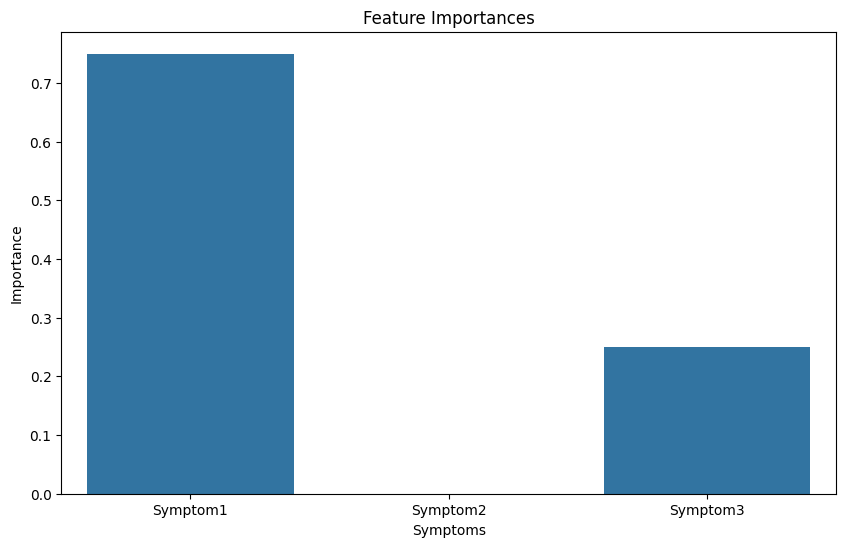

In [ ]:
# Predicting using the trained model for evaluation
y_pred = model.predict(X)

# Feature importance
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for symptom, importance in zip(['Symptom1', 'Symptom2', 'Symptom3'], feature_importances):
    print(f'{symptom}: {importance:.4f}')

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=['Symptom1', 'Symptom2', 'Symptom3'], y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Symptoms')
plt.ylabel('Importance')
plt.show()


Confusion Matrix:
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


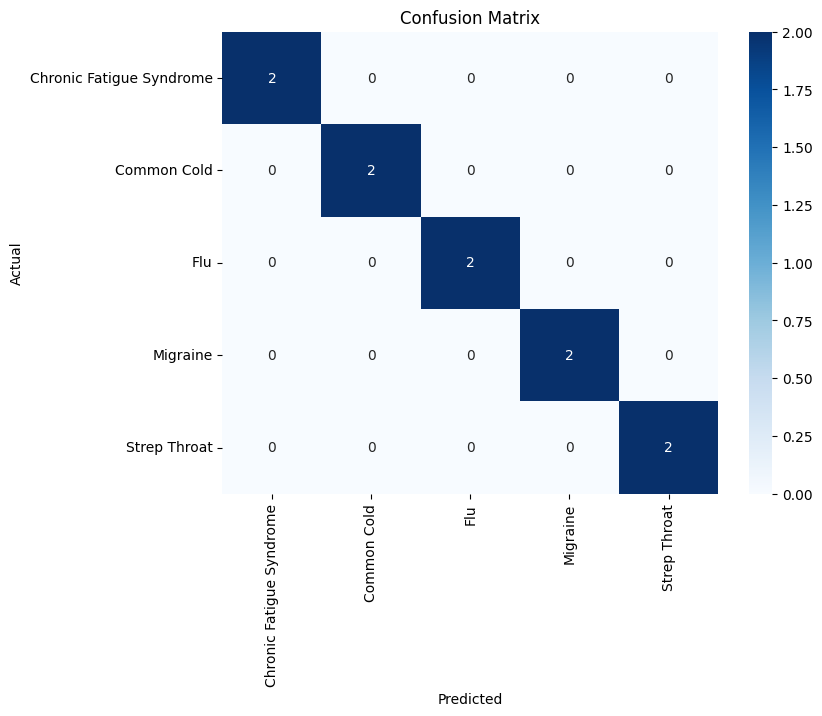


Accuracy: 1.0000

Classification Report:
                          precision    recall  f1-score   support

Chronic Fatigue Syndrome       1.00      1.00      1.00         2
             Common Cold       1.00      1.00      1.00         2
                     Flu       1.00      1.00      1.00         2
                Migraine       1.00      1.00      1.00         2
            Strep Throat       1.00      1.00      1.00         2

                accuracy                           1.00        10
               macro avg       1.00      1.00      1.00        10
            weighted avg       1.00      1.00      1.00        10



In [ ]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_disease.classes_, yticklabels=label_encoder_disease.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy and Classification Report
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_encoder_disease.classes_))